# Analyse exploratoire du jeu de données pour prédire les prix de l'électricité

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('X_train_NHkHMNU.csv')
data.describe()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,0.780699,0.395019,-0.134330,-0.434518,0.537398,0.105639,-0.468190,-0.446805,0.246707,0.608185,0.146337,0.398426,-0.298856,0.071633,-0.153688,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510
std,618.013179,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,0.850190,0.906500,0.847285,0.506141,1.086330,1.057867,0.902468,0.964543,1.069899,1.079398,1.064187,1.189404,0.851339,0.851499,0.896325,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,-1.117260,-1.317350,-1.491593,-0.794950,-1.373985,-1.758523,-2.689387,-2.595326,-1.442296,-1.312588,-1.235802,-1.143277,-2.879041,-2.613569,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,540.250000,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,0.134947,-0.205078,-0.833046,-0.779098,-0.314520,-0.693892,-0.954908,-1.228912,-0.731345,-0.311343,-0.688284,-0.527749,-0.787239,-0.422896,-0.802333,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968
50%,1077.500000,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,0.740006,0.256780,-0.246732,-0.766389,0.330832,-0.138049,-0.097032,-0.327874,0.211219,0.566797,-0.091336,0.007051,-0.188300,0.151799,-0.460160,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056
75%,1597.500000,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,1.399461,1.090646,0.485761,-0.262886,1.282374,0.776483,0.100720,0.143426,1.158397,1.368670,0.644247,1.010071,0.273510,0.621209,0.382191,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,3.118082,2.372570,2.324889,1.905512,4.181936,3.730478,0.893087,1.854408,2.696571,3.648905,3.509017,4.965793,1.586885,2.539576,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


In [5]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
country_cat=data[['COUNTRY']]
country_cat_encoded=ordinal_encoder.fit_transform(country_cat)
print(country_cat_encoded)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


In [8]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
country_cat_1hot=onehot_encoder.fit_transform(country_cat)
print(country_cat_1hot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1494 stored elements and shape (1494, 2)>
  Coords	Values
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (1469, 1)	1.0
  (1470, 1)	1.0
  (1471, 1)	1.0
  (1472, 1)	1.0
  (1473, 0)	1.0
  (1474, 1)	1.0
  (1475, 1)	1.0
  (1476, 1)	1.0
  (1477, 1)	1.0
  (1478, 1)	1.0
  (1479, 1)	1.0
  (1480, 1)	1.0
  (1481, 1)	1.0
  (1482, 1)	1.0
  (1483, 1)	1.0
  (1484, 0)	1.0
  (1485, 0)	1.0
  (1486, 1)	1.0
  (1487, 1)	1.0
  (1488, 0)	1.0
  (1489, 0)	1.0
  (1490, 1)	1.0
  (1491, 0)	1.0
  (1492, 1)	1.0
  (1493, 0)	1.0


In [9]:
country_cat_1hot.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], shape=(1494, 2))

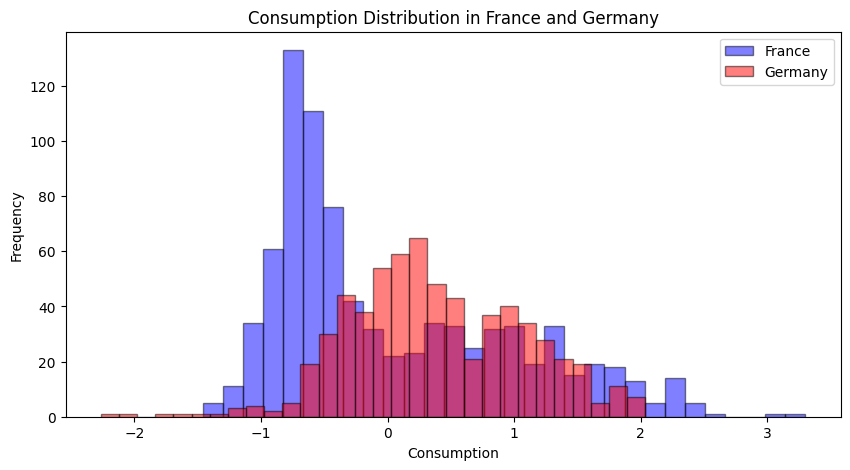

In [3]:
df_fr = data[data['COUNTRY'] == 'FR']
df_de = data[data['COUNTRY'] == 'DE']

plt.figure(figsize=(10, 5))
plt.hist(df_fr['FR_CONSUMPTION'], bins=30, alpha=0.5, label='France', color='blue', edgecolor='black')
plt.hist(df_de['DE_CONSUMPTION'], bins=30, alpha=0.5, label='Germany', color='red', edgecolor='black')
plt.title('Consumption Distribution in France and Germany')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.legend()
plt.show()

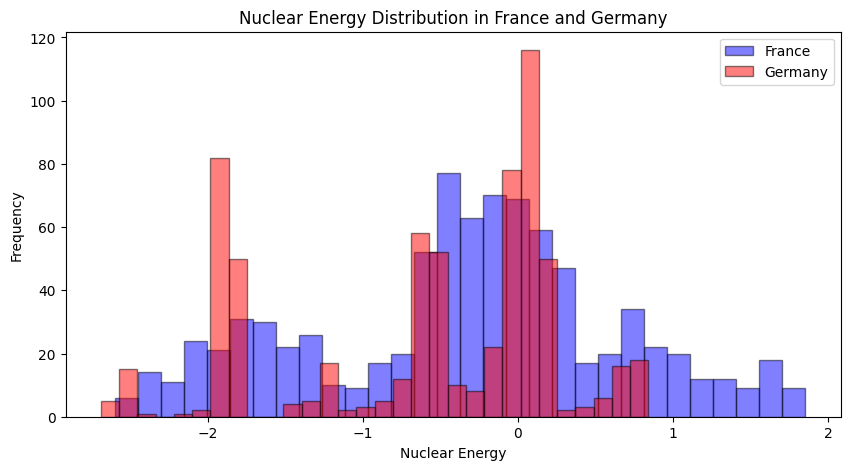

In [4]:
plt.figure(figsize=(10, 5))
plt.hist(df_fr['FR_NUCLEAR'], bins=30, alpha=0.5, label='France', color='blue', edgecolor='black')
plt.hist(df_de['DE_NUCLEAR'], bins=30, alpha=0.5, label='Germany', color='red', edgecolor='black')
plt.title('Nuclear Energy Distribution in France and Germany')
plt.xlabel('Nuclear Energy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

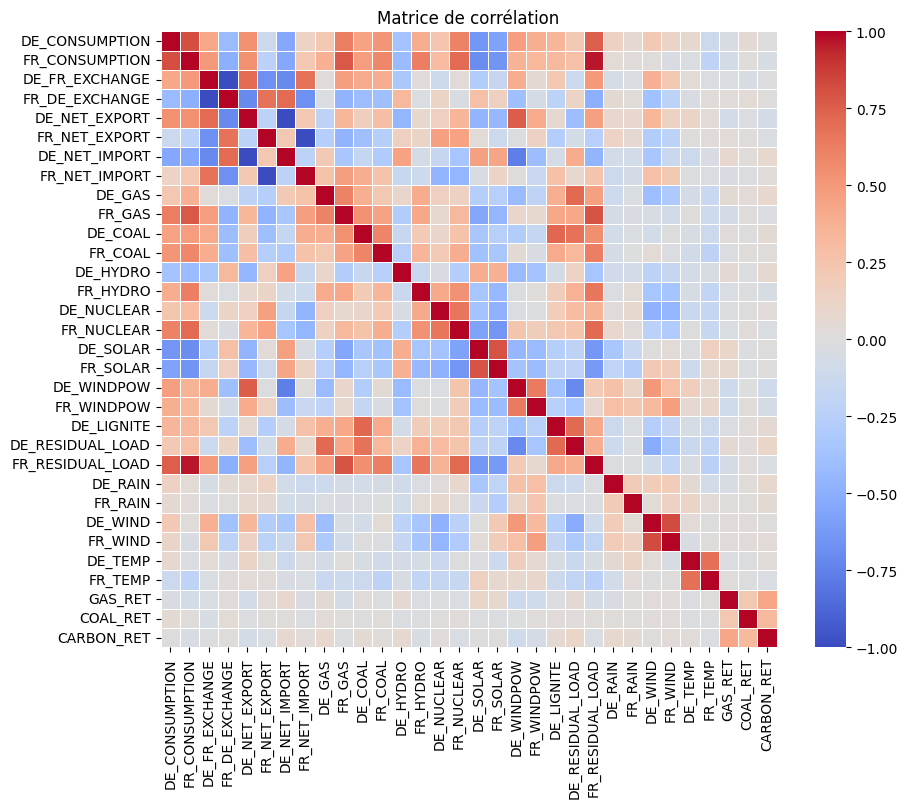

In [ ]:
import numpy as np
import seaborn as sns
df=data.copy()
df.drop(['ID','DAY_ID','COUNTRY'], axis=1, inplace=True)
matrix=df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Matrice de corrélation")
plt.show()


Text(0.5, 1.0, 'Residual Load vs Consumption in France')

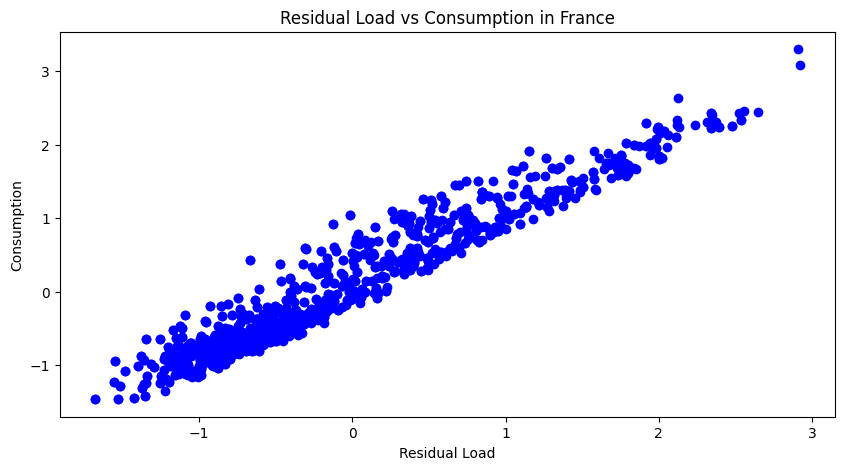

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(data['FR_RESIDUAL_LOAD'], data['FR_CONSUMPTION'], label='France Consumption', color='blue')
plt.xlabel('Residual Load')
plt.ylabel('Consumption')   
plt.title('Residual Load vs Consumption in France')

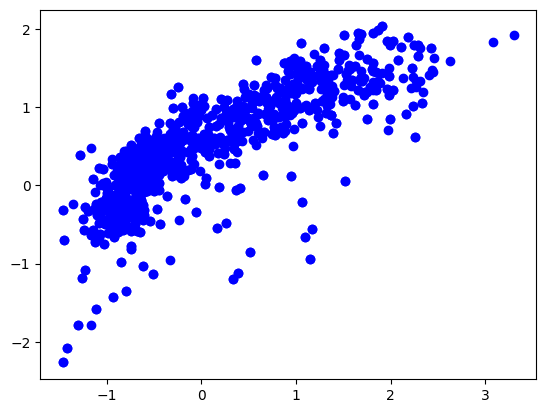

In [7]:
plt.Figure(figsize=(10, 5))
plt.scatter(data['FR_CONSUMPTION'], data['DE_CONSUMPTION'], label='ds', color='blue')

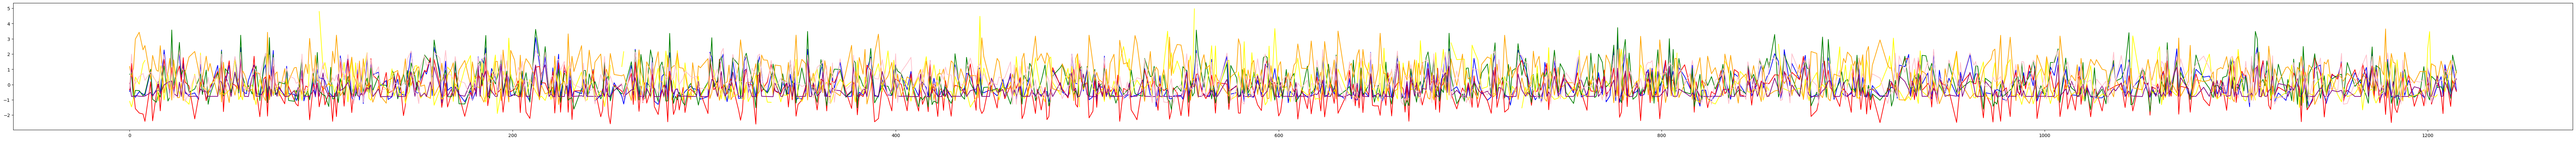

In [8]:
df_sorted = data.sort_values(by='DAY_ID')

plt.figure(figsize=(100, 5))
plt.plot(df_sorted['DAY_ID'], df_sorted['FR_CONSUMPTION'], label='France Consumption', color='blue')
plt.plot(df_sorted['DAY_ID'], df_sorted['FR_NUCLEAR'], label='Germany Consumption', color='red')
plt.plot(df_sorted['DAY_ID'], df_sorted['FR_HYDRO'], label='Germany Consumption', color='green')
plt.plot(df_sorted['DAY_ID'], df_sorted['FR_WIND'], label='Germany Consumption', color='yellow')
plt.plot(df_sorted['DAY_ID'], df_sorted['FR_SOLAR'], label='Germany Consumption', color='orange')
plt.plot(df_sorted['DAY_ID'], df_sorted['FR_COAL'], label='Germany Consumption', color='purple')
plt.plot(df_sorted['DAY_ID'], df_sorted['FR_GAS'], label='Germany Consumption', color='pink')   



,ID,TARGET
count,1494.000000,1494.000000
mean,1072.759036,0.089934
std,618.013179,1.034582
min,0.000000,-6.519268
25%,540.250000,-0.219861
50%,1077.500000,0.000000
75%,1597.500000,0.269719
max,2146.000000,7.786578


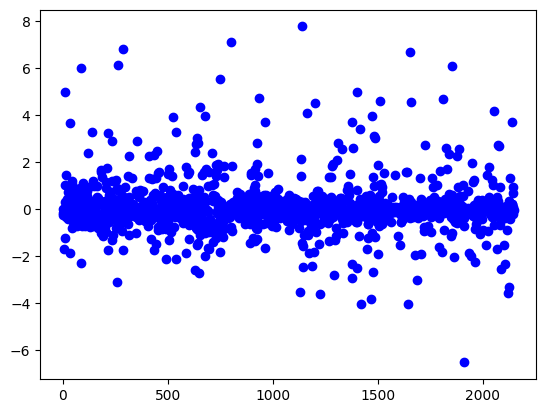

In [25]:
dy=pd.read_csv('y_train_ZAN5mwg.csv')
dy=dy.sort_values(by='ID')
plt.scatter(dy['ID'], dy['TARGET'], label='Prices', color='blue')
dy.describe()

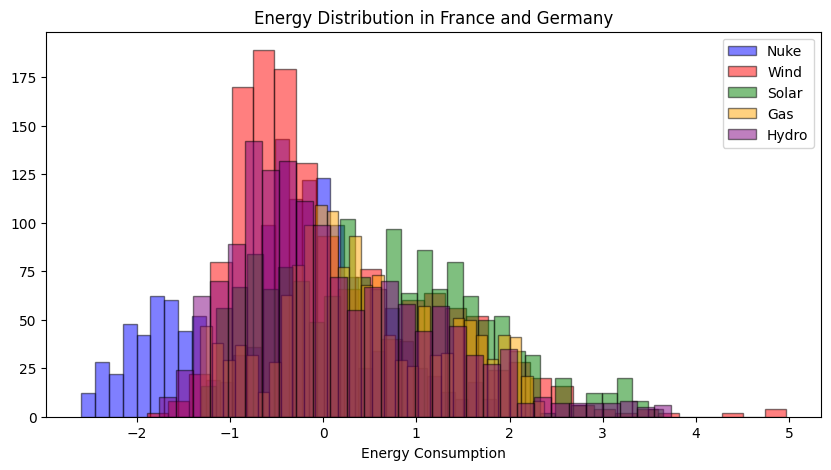

In [34]:
plt.figure(figsize=(10, 5))
plt.hist(df['FR_NUCLEAR'], bins=30, alpha=0.5, label='Nuke', color='blue', edgecolor='black')
plt.hist(df['FR_WIND'], bins=30, alpha=0.5, label='Wind', color='red', edgecolor='black')
plt.hist(df['FR_SOLAR'], bins=30, alpha=0.5, label='Solar', color='green', edgecolor='black')
#plt.hist(df['FR_COAL'], bins=30, alpha=0.5, label='Coal', color='yellow', edgecolor='black')
plt.hist(df['FR_GAS'], bins=30, alpha=0.5, label='Gas', color='orange', edgecolor='black')
plt.hist(df['FR_HYDRO'], bins=30, alpha=0.5, label='Hydro', color='purple', edgecolor='black')
plt.title('Energy Distribution in France and Germany')
plt.xlabel('Energy Consumption')    
plt.legend()